In [21]:
import pandas as pd

weights_dir = "./model_weights/clean/pick/imbalanced_LCBC/pick_and_place_simple-AlarmClock-None-Desk-307"
res_path = weights_dir + '/results.csv'
df = pd.read_csv(res_path)

df['pick_sum'] = 0
for i in range(14):
    col_name = "pick_" + str(i)
    df['pick_sum'] += df[col_name]
    
df.drop(df.columns[[0, 1]], axis = 1, inplace = True)
df_lcbc = df

lcbc_sum = df_lcbc['pick_sum'].to_list()


In [33]:
import pandas as pd

weights_dir = "./model_weights/clean/pick/imbalanced_ours/pick_and_place_simple-AlarmClock-None-Desk-307"
res_path = weights_dir + '/results_in_dist_11.csv'
df = pd.read_csv(res_path)

df['pick_sum'] = 0
for i in range(14):
    col_name = "pick_" + str(i)
    df['pick_sum'] += df[col_name]
    
df.drop(df.columns[[0, 1]], axis = 1, inplace = True)
df_ours = df

In [35]:

x = df_ours['epoch'].to_list()
ours_sum = df_ours['pick_sum'].to_list()
ours_sum


[4.0, 9.0]

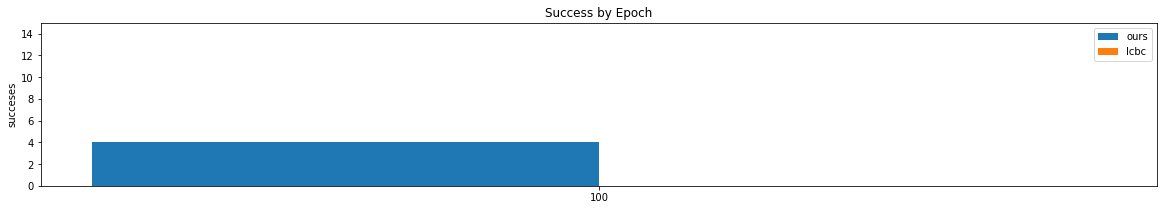

In [25]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,3)

N = len(ours_sum)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, ours_sum, width, label='ours')

plt.bar(ind + width, lcbc_sum[:N], width, label='lcbc')

plt.ylabel('Successful Objects')
plt.ylabel('succeses')
plt.title('Success by Epoch')

plt.xticks(ind + width / 2, x)
plt.ylim([0, 15])
plt.legend(loc='best')
plt.show()

In [46]:
weights_dir = "./model_weights/clean/pick/imbalanced_ours/pick_and_place_simple-AlarmClock-None-Desk-307"
res_path = weights_dir + '/results_.csv'
df = pd.read_csv(res_path)

df['pick_sum'] = 0
for i in range(14):
    col_name = "pick_" + str(i)
    df['pick_sum'] += df[col_name]
    
df.drop(df.columns[[0, 1]], axis = 1, inplace = True)
df_ours = df


# df['in_dist_sum'] = 0
# for i in range(14):
#     col_name = "in_dist_" + str(i)
#     df['in_dist_sum'] += df[col_name]


# df['out_dist_sum'] = 0
# for i in range(14):
#     col_name = "out_dist_" + str(i)
#     df['out_dist_sum'] += df[col_name]
    
df[['epoch', 'pick_sum']]

,epoch,pick_sum
0,0,0.0
1,100,7.0
2,200,8.0
3,300,7.0
4,400,7.0
5,500,7.0
6,600,7.0
7,700,9.0
8,800,8.0
9,900,7.0


In [49]:
weights_dir = "./model_weights/clean/pick/imbalanced_ours/pick_and_place_simple-AlarmClock-None-Desk-307"
res_path = weights_dir + '/results_ood_2.csv'
df = pd.read_csv(res_path)

df['pick_sum'] = 0
for i in range(14):
    col_name = "pick_" + str(i)
    df['pick_sum'] += df[col_name]
    
df.drop(df.columns[[0, 1]], axis = 1, inplace = True)
df_ours = df


df['in_dist_sum'] = 0
for i in range(14):
    col_name = "in_dist_" + str(i)
    df['in_dist_sum'] += df[col_name]


df['out_dist_sum'] = 0
for i in range(14):
    col_name = "out_dist_" + str(i)
    df['out_dist_sum'] += df[col_name]
    
df[['epoch', 'pick_sum',
       'in_dist_sum', 'out_dist_sum']]

,epoch,pick_sum,in_dist_sum,out_dist_sum
0,300,7.0,36.0,114.0
1,600,7.0,83.0,59.0
2,700,9.0,89.0,35.0
3,1000,11.0,68.0,23.0


In [50]:
weights_dir = "./model_weights/clean/pick/imbalanced_ours/pick_and_place_simple-AlarmClock-None-Desk-307"
res_path = weights_dir + '/results_in_dist_11.csv'
df = pd.read_csv(res_path)

df['pick_sum'] = 0
for i in range(14):
    col_name = "pick_" + str(i)
    df['pick_sum'] += df[col_name]
    
df.drop(df.columns[[0, 1]], axis = 1, inplace = True)
df_ours = df

df['in_dist_sum'] = 0
for i in range(14):
    col_name = "in_dist_" + str(i)
    df['in_dist_sum'] += df[col_name]


df['out_dist_sum'] = 0
for i in range(14):
    col_name = "out_dist_" + str(i)
    df['out_dist_sum'] += df[col_name]
    
df[['epoch', 'pick_sum',
       'in_dist_sum', 'out_dist_sum']]

,epoch,pick_sum,in_dist_sum,out_dist_sum
0,0,1.0,215.0,0.0
1,100,4.0,110.0,0.0
2,700,7.0,141.0,0.0
3,800,6.0,141.0,0.0
4,1000,9.0,104.0,0.0


In [73]:

df_successes = df

df_successes['pick_sum'] = 0
for i in range(14):
    col_name = "pick_" + str(i)
    df_successes['pick_sum'] += df_successes[col_name]
    

df_successes['out_dist_sum'] = 0
df_successes['in_dist_sum'] = 0
for index, row in df.iterrows():
    for i in range(14):
        col_name = "pick_" + str(i)
        if row[col_name] >0:
            df_successes.loc[df_successes.index[index], 'in_dist_sum'] += row["in_dist_" + str(i)]
            df_successes.loc[df_successes.index[index], 'out_dist_sum'] += row["out_dist_" + str(i)]
            
            
df_successes[['epoch', 'pick_sum','in_dist_sum', 'out_dist_sum']]

,epoch,pick_sum,in_dist_sum,out_dist_sum
0,0,0.0,0.0,0.0
1,100,7.0,14.0,3.0
2,200,8.0,11.0,7.0
3,300,7.0,6.0,11.0
4,400,7.0,10.0,7.0
5,500,7.0,10.0,8.0
6,600,7.0,9.0,10.0
7,700,9.0,17.0,7.0
8,900,7.0,9.0,7.0
9,1000,11.0,17.0,14.0


In [85]:


df_fails = df

df_fails['pick_sum'] = 0
for i in range(14):
    col_name = "pick_" + str(i)
    df_fails['pick_sum'] += df_fails[col_name]
    

df_fails['out_dist_sum'] = 0
df_fails['in_dist_sum'] = 0
for index, row in df.iterrows():
    for i in range(14):
        col_name = "pick_" + str(i)
        if row[col_name] == 0:
            df_fails.loc[df_fails.index[index], 'in_dist_sum'] += row["in_dist_" + str(i)]
            df_fails.loc[df_fails.index[index], 'out_dist_sum'] += row["out_dist_" + str(i)]
            
            
df_fails[['epoch','in_dist_sum', 'out_dist_sum']]

,epoch,in_dist_sum,out_dist_sum
0,0,197.0,0.0
1,100,106.0,15.0
2,400,113.0,0.0
3,500,106.0,0.0
4,600,115.0,0.0
5,900,106.0,0.0


In [80]:
df.iloc[:,19:33]

,in_dist_1,in_dist_10,in_dist_11,in_dist_12,in_dist_13,in_dist_14,in_dist_2,in_dist_3,in_dist_4,in_dist_5,in_dist_6,in_dist_7,in_dist_8,in_dist_9
0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,20.0,20.0,0.0,0.0,0.0,20.0
1,6.0,2.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,5.0,0.0,0.0,3.0
2,5.0,2.0,1.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0,3.0,2.0,0.0,20.0
3,0.0,0.0,2.0,3.0,0.0,3.0,1.0,2.0,2.0,1.0,1.0,0.0,3.0,2.0
4,2.0,0.0,2.0,0.0,3.0,20.0,1.0,2.0,12.0,1.0,20.0,2.0,3.0,2.0
5,5.0,2.0,2.0,0.0,3.0,4.0,0.0,2.0,12.0,3.0,1.0,0.0,0.0,6.0
6,3.0,0.0,1.0,0.0,4.0,16.0,4.0,2.0,3.0,3.0,5.0,0.0,6.0,20.0
7,2.0,2.0,2.0,0.0,3.0,4.0,0.0,2.0,1.0,3.0,1.0,20.0,3.0,2.0
8,5.0,2.0,1.0,0.0,1.0,2.0,3.0,1.0,2.0,3.0,1.0,20.0,3.0,2.0
9,1.0,0.0,1.0,3.0,0.0,4.0,20.0,2.0,0.0,4.0,0.0,2.0,3.0,20.0


In [83]:
df.iloc[:,33: 33+14]

,out_dist_0,out_dist_1,out_dist_10,out_dist_11,out_dist_12,out_dist_13,out_dist_14,out_dist_2,out_dist_3,out_dist_4,out_dist_5,out_dist_6,out_dist_7,out_dist_8
0,20.0,20.0,20.0,20.0,20.0,0.0,20.0,20.0,20.0,0.0,0.0,20.0,20.0,20.0
1,1.0,14.0,0.0,0.0,20.0,20.0,19.0,8.0,0.0,2.0,0.0,0.0,2.0,20.0
2,0.0,15.0,0.0,1.0,3.0,17.0,2.0,20.0,1.0,2.0,2.0,0.0,0.0,13.0
3,1.0,20.0,2.0,0.0,17.0,20.0,0.0,12.0,0.0,18.0,2.0,4.0,2.0,17.0
4,0.0,18.0,2.0,0.0,3.0,17.0,0.0,19.0,0.0,8.0,2.0,0.0,0.0,0.0
5,0.0,15.0,0.0,0.0,3.0,17.0,8.0,14.0,0.0,0.0,0.0,3.0,2.0,13.0
6,1.0,17.0,2.0,19.0,3.0,2.0,4.0,16.0,0.0,0.0,0.0,15.0,2.0,14.0
7,0.0,18.0,0.0,0.0,3.0,1.0,16.0,20.0,0.0,3.0,0.0,19.0,0.0,0.0
8,0.0,15.0,0.0,1.0,3.0,2.0,18.0,17.0,1.0,18.0,0.0,19.0,0.0,17.0
9,0.0,2.0,2.0,1.0,0.0,5.0,0.0,0.0,0.0,4.0,0.0,20.0,0.0,0.0


In [52]:
weights_dir = "./model_weights/clean/pick/imbalanced_ours/pick_and_place_simple-AlarmClock-None-Desk-307"
res_path = weights_dir + '/results_in_dist_11.csv'
df = pd.read_csv(res_path)

df['pick_sum'] = 0
for i in range(14):
    col_name = "pick_" + str(i)
    df['pick_sum'] += df[col_name]
    
df.drop(df.columns[[0, 1]], axis = 1, inplace = True)
df_ours = df

df['in_dist_sum'] = 0
for i in range(14):
    col_name = "in_dist_" + str(i)
    df['in_dist_sum'] += df[col_name]


df['out_dist_sum'] = 0
for i in range(14):
    col_name = "out_dist_" + str(i)
    df['out_dist_sum'] += df[col_name]
    
df[['epoch', 'pick_sum',
       'in_dist_sum', 'out_dist_sum']]

,epoch,pick_sum,in_dist_sum,out_dist_sum
0,0,1.0,215.0,0.0
1,100,4.0,110.0,0.0
2,700,7.0,141.0,0.0
3,800,6.0,141.0,0.0
4,1000,9.0,104.0,0.0
